## Машинное обучение с учителем

Построение модели машинного обучения на основе пар "объект - ответ", из которых состоит наш датасет.  
**Цель:** получение прогноза для новоых, никогда ранее не встречавшихся данных  

**Основные задачи:** 
- классификация (**classification**): спрогнозировать метку класса (class label). Например, классифицировать письмо на спам или не спам (*бинарная классификация*) или классифицировать язык веб-сайта при заранее определенном списке возможных языков (*мультиклассовая классификация*)  
- регрессия (**regression**): спрогнозировать число с плавающей точкой (floating - point number). Например, прогнозирование годового дохода человека в зависимости от его места жительства, образования и возраста   

*Главное отличие* регрессии от классификации состоит в том, что в последней заложены четко определенные варианты, в то время как в регрессии заложена "непрерывность ответов" (например, нет особой разница между годовым доходом в 400 000 и 401 000, а вот разница между двумя разными языками сайта существенна).  

## Переобучение, недообучение  
Показатель качества построенной модели - это использование *тестовой выборки* (**test data**). Если тестовая и обучающая выборки схожи между собой, то следует ожидать, что модель будет давать на тестовом наборе примерно тот же результат, что и на тренировочном. Но часто встречаются ситуации, когда выборки мало схожи между собой.  

Чем сложнее построенная модель, тем лучше она будет работать на обучающей выборке. Под *сложной* моделью следует понимать сложные правила отбора, сформированные в ходе обучения. Построение модели, которая очень хорошо работает на обучающем наборе, но плохо работает на тестовом, называется *переобучением* (**overfitting**). Оно происходит тогда, когда модель слишком точно подстраивается под особенности обучающей выборки. С другой стороны, модель может быть очень проста, тогда она будет (вероятно) плохо работать как на обучающем, так и на тестовом наборе. Такая ситуация называется *недообучением* (**underfitting**).  


Если модель может выдавать точные прогнозы на ранее не встречавшихся данных, то можно сказать, что она обладает способность *обобщать* (**generalize**) 

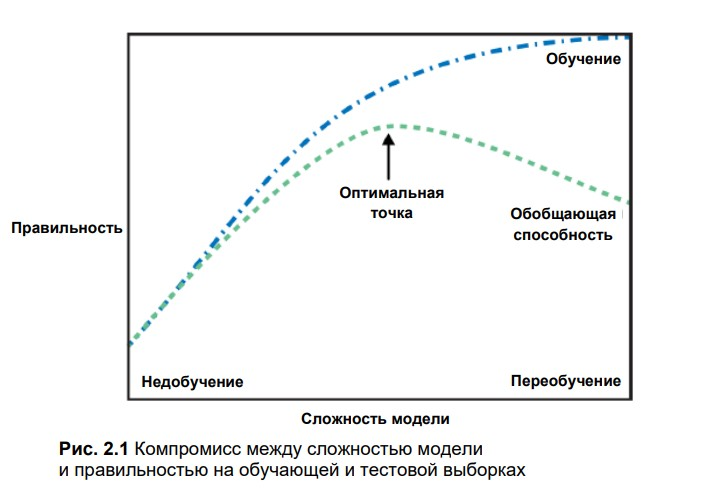

## Взаимосвязь сложности модели и обучающего набора  
Сложность модели тесно связана с обучающим набором (а именно, с *разнообразием* его содержимого): чем больше разнообразие различных точек данных в вашем наборе, тем более сложную модель можно использовать, не беспокоясь об переобучении.  
Обычно чем больше набор, тем больше разнообразие

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
import pandas as pd

cancer = load_breast_cancer()
boston = load_boston()

In [22]:
# Набор данных по раку молочной железы
# Признаками является клинические измерения опухолей
# Классы - "доброкачественная" опухоль (benign, неагрессивная)
# и "злокачественная" (malignant, раковая)

print('Имена признаков: \n', cancer.feature_names)
print('Количество признаков:', len(cancer.feature_names))
print('Метки классов:', cancer.target_names)

Имена признаков: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Количество признаков: 30
Метки классов: ['malignant' 'benign']


In [23]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
print('Признаки: \n', boston.feature_names)
print('Количество точек данных:', len(boston.data))

Признаки: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Количество точек данных: 506


In [25]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Иногда для увеличения числа признаков учитывают *взаимодействия признаков между собой* (**interactions**). Такие признаки называются *производными*. Включение производных признаков является важным разделом машинного обучения - *конструирование признаков* (**feature engineering**).